# Carlos Saul | Incremento PBI anual vs crédito externo

In [25]:
import pandas as pd

Quiero comparar
- incremento PBI anual, en U$S
- créditos recibidos desde el exterior tanto al sector público como privado

## PBI

### Fuente: gobierno Argentina

In [26]:
# https://datos.gob.ar/dataset/sspm-producto-interno-bruto-dolares-producto-interno-bruto-per-capita-poblacion
pbi_url = "https://infra.datos.gob.ar/catalog/sspm/dataset/9/distribution/9.1/download/producto-interno-bruto-precios-corrientes-valores-anuales-base-2004.csv"
pbi = pd.read_csv(pbi_url)

In [27]:
pbi.columns

Index(['indice_tiempo', 'pib_precios_corrientes', 'pib_precios_2004',
       'tcn_pesos_dolares', 'pib_dolares_precios_corrientes', 'poblacion',
       'pib_per_capita_pesos_corrientes', 'pib_per_capita_dolares_corrientes',
       'indice_precios_constantes'],
      dtype='object')

In [28]:
pbi['indice_tiempo']

0     2004-01-01
1     2005-01-01
2     2006-01-01
3     2007-01-01
4     2008-01-01
5     2009-01-01
6     2010-01-01
7     2011-01-01
8     2012-01-01
9     2013-01-01
10    2014-01-01
11    2015-01-01
12    2016-01-01
13    2017-01-01
14    2018-01-01
15    2019-01-01
Name: indice_tiempo, dtype: object

¡Es joda esto! Solo desde el 2004...   
Necesito otra fuente.

## Fuente: Banco Mundial
https://datos.bancomundial.org/indicator/NY.GDP.MKTP.CD?locations=AR   
Meta:   
https://databank.bancomundial.org/reports.aspx?source=2&type=metadata&series=NY.GDP.MKTP.CD#

PIB (US$ a precios actuales) - Argentina
Algunos metadatos están solo en inglés

El PIB a precio de comprador es la suma del valor agregado bruto de todos los productores residentes en la economía más todo impuesto a los productos, menos todo subsidio no incluido en el valor de los productos. Se calcula sin hacer deducciones por depreciación de bienes manufacturados o por agotamiento y degradación de recursos naturales. Los datos se expresan en moneda local a precios corrientes. Las cifras en dólares del PIB se obtuvieron convirtiendo el valor en moneda local utilizando los tipos de cambio oficiales de un único año. Para algunos países donde el tipo de cambio oficial no refleja el tipo efectivamente aplicado a las transacciones en divisas, se utiliza un factor de conversión alternativo.

ID: NY.GDP.MKTP.CD   
Fuente: Datos sobre las cuentas nacionales del Banco Mundial y archivos de datos sobre cuentas nacionales de la OCDE.

In [29]:
pbi_BM_url= 'http://api.worldbank.org/v2/es/indicator/NY.GDP.MKTP.CD?downloadformat=csv'

In [30]:
import urllib.request
pbi_BM_zip = 'pbi_BM.zip'
urllib.request.urlretrieve(pbi_BM_url, pbi_BM_zip)

('pbi_BM.zip', <http.client.HTTPMessage at 0x7fbe6d346518>)

In [31]:
from zipfile import ZipFile

zip_file = ZipFile(pbi_BM_zip)
filess = [text_file.filename
       for text_file in zip_file.infolist()
       if text_file.filename.endswith('.csv')]

In [32]:
filess

['Metadata_Indicator_API_NY.GDP.MKTP.CD_DS2_es_csv_v2_2015452.csv',
 'API_NY.GDP.MKTP.CD_DS2_es_csv_v2_2015452.csv',
 'Metadata_Country_API_NY.GDP.MKTP.CD_DS2_es_csv_v2_2015452.csv']

In [33]:
# levantar archivo con datos
pbi_BM = pd.read_csv(zip_file.open(filess[1]), skiprows = 3)

In [34]:
# Argentina
pbi_BM_AR = pbi_BM.loc[pbi_BM['Country Name']=='Argentina']
pbi_BM_AR

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
7,Argentina,ARG,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,NaN,NaN,2.445060e+10,1.827212e+10,2.560525e+10,2.834471e+10,...,5.459824e+11,5.520251e+11,5.263197e+11,5.947493e+11,5.575314e+11,6.436287e+11,5.176267e+11,4.454452e+11,NaN,NaN


In [49]:
# PBI Convertibilidad: 1991 a 2002
end_year = 52
pbi_BM_AR_Carlo = pbi_BM_AR.iloc[:,35:end_year]
pbi_BM_AR_Carlo

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
7,1.897200e+11,2.287886e+11,2.367417e+11,2.574400e+11,2.580318e+11,2.721498e+11,2.928590e+11,2.989482e+11,2.835230e+11,2.842038e+11,2.686968e+11,9.772400e+10,1.275870e+11,1.646579e+11,1.987371e+11,2.325573e+11,2.875305e+11


In [50]:
# PBI diferencia interanual
delta_pbi_BM_AR_Carlo = pbi_BM_AR_Carlo.diff(axis = 1)
delta_pbi_BM_AR_Carlo

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
7,NaN,3.906863e+10,7.953098e+09,2.069828e+10,591750000.0,1.411800e+10,2.070925e+10,6.089250e+09,-1.542525e+10,680750000.0,-1.550700e+10,-1.709727e+11,2.986297e+10,3.707096e+10,3.407916e+10,3.382017e+10,5.497325e+10


<AxesSubplot:title={'center':'$\\Delta$PBI interanual'}, ylabel='U$S'>

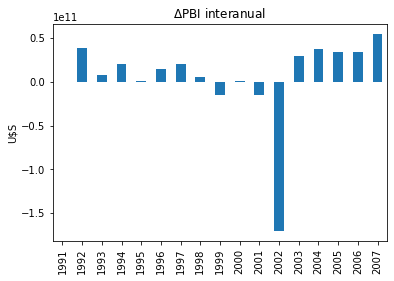

In [51]:
(delta_pbi_BM_AR_Carlo.T).plot(kind='bar', legend=False, ylabel='U$S', title='$\Delta$PBI interanual')

## Deuda externa

https://datos.bancomundial.org/indicator/DT.DOD.DECT.CD?locations=AR  
Meta:  
https://databank.bancomundial.org/data/reports.aspx?source=2&type=metadata&series=DT.DOD.DECT.CD

Deuda externa acumulada, total (DOD, US$ a precios actuales) - Argentina
Algunos metadatos están solo en inglés

La deuda externa total es el monto adeudado a los no residentes, que se reembolsa en divisas, bienes o servicios. La deuda externa total es la suma de la deuda a largo plazo pública, con garantía pública, y privada no garantizada, el uso del crédito del FMI y la deuda a corto plazo. La deuda a corto plazo incluye toda la deuda con un vencimiento original de un año o menos y los atrasos en los intereses de la deuda a largo plazo. Datos en US$ a precios actuales.

ID: DT.DOD.DECT.CD  
Fuente: Banco Mundial, Flujos Mundiales de Financiamiento para el Desarrollo .

Location-specific metadata  
Argentina: Long-term public and publicly guaranteed and long-term private nonguaranteed debt data for 2019 are based on reports provided by the country. Long-term private nonguaranteed debt data before 2008 are World Bank staff estimates. Short-term debt data for 2019 are sourced by the Quarterly External Debt Statistics database (http://datatopics.worldbank.org/debt/qeds).

In [52]:
deuda_BM_url = 'http://api.worldbank.org/v2/es/indicator/DT.DOD.DECT.CD?downloadformat=csv'

In [53]:
deuda_BM_zip = 'deuda_BM.zip'
urllib.request.urlretrieve(deuda_BM_url, deuda_BM_zip)

('deuda_BM.zip', <http.client.HTTPMessage at 0x7fbe6d04dd68>)

In [54]:
zip_file = ZipFile(deuda_BM_zip)
filess = [text_file.filename
       for text_file in zip_file.infolist()
       if text_file.filename.endswith('.csv')]

In [55]:
filess

['Metadata_Indicator_API_DT.DOD.DECT.CD_DS2_es_csv_v2_2045851.csv',
 'API_DT.DOD.DECT.CD_DS2_es_csv_v2_2045851.csv',
 'Metadata_Country_API_DT.DOD.DECT.CD_DS2_es_csv_v2_2045851.csv']

In [56]:
# levantar archivo con datos
deuda_BM = pd.read_csv(zip_file.open(filess[1]), skiprows = 3)

In [57]:
# Deuda Argentina
deuda_BM_AR = deuda_BM.loc[pbi_BM['Country Name']=='Argentina']
deuda_BM_AR

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
7,Argentina,ARG,"Deuda externa acumulada, total (DOD, US$ a pre...",DT.DOD.DECT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.398777e+11,1.502250e+11,1.537938e+11,1.771846e+11,1.893317e+11,2.369634e+11,2.836242e+11,2.793058e+11,NaN,NaN


In [58]:
# Deuda Convertibilidad: 1991 a 2002
deuda_BM_AR_Carlo = deuda_BM_AR.iloc[:,35:end_year]
deuda_BM_AR_Carlo

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
7,6.567237e+10,6.860564e+10,6.468139e+10,7.509406e+10,9.877312e+10,1.111455e+11,1.282514e+11,1.415045e+11,1.519138e+11,1.500629e+11,1.526499e+11,1.483202e+11,1.634427e+11,1.679996e+11,1.307885e+11,1.189212e+11,1.208180e+11


In [59]:
# Douda diferencia interanual
delta_deuda_BM_AR_Carlo = deuda_BM_AR_Carlo.diff(axis = 1)
delta_deuda_BM_AR_Carlo

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
7,NaN,2.933272e+09,-3.924252e+09,1.041267e+10,2.367906e+10,1.237238e+10,1.710594e+10,1.325306e+10,1.040930e+10,-1.850873e+09,2.587001e+09,-4.329737e+09,1.512250e+10,4.556947e+09,-3.721115e+10,-1.186726e+10,1.896806e+09


<AxesSubplot:title={'center':'$\\Delta$Deuda externa'}, ylabel='U$S'>

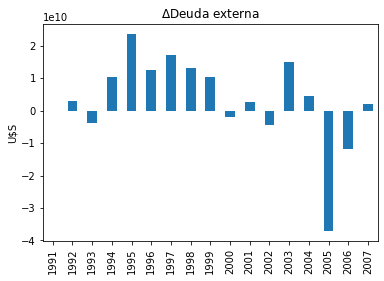

In [60]:
(delta_deuda_BM_AR_Carlo.T).plot(kind='bar', legend=False, ylabel='U$S', title='$\Delta$Deuda externa')

## Comparemos

In [61]:
compara = pd.DataFrame(delta_pbi_BM_AR_Carlo.T)
compara.columns=['$\Delta$PBI']
compara['$\Delta$Deuda externa'] = delta_deuda_BM_AR_Carlo.T

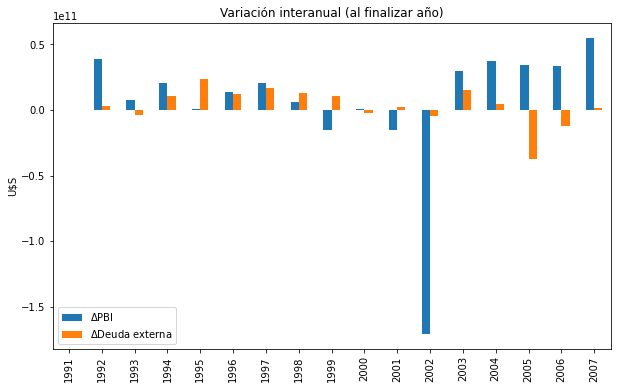

In [63]:
compara_plot = compara.plot(kind='bar', ylabel='U$S', title='Variación interanual (al finalizar año)', figsize=(10,6) )

In [65]:
compara_plot.figure.savefig('compara_plot.png')